## My Learnings about Linear Regression

**Disclaimer:** This notebook is a personal record of my understanding and explorations in linear regression. It should not be treated as definitive or authoritative, but rather a snapshot of my learning journey.

### Overview
- Linear regression is a method for modeling the relationship between one or more variables (features) and a expected output (target).
- The goal is to find a linear function that best fits the data according to a chosen function or dataset, by minimizing the Mean Squared Error (MSE).



### Linear Regression Overview

Linear Regression considers the output as the result of a linear function of the input variables. The model is defined as:

$$
Y = w_0 + w_1 \times X_1 + w_2 \times X_2 + \dots + w_n \times X_n
$$

where:
- **$w_0$** is the intercept,
- **$w_1, w_2, \dots, w_n$** are the coefficients corresponding to each feature $X_1, X_2, \dots, X_n$.

---

### Matrix Representation of Input Data

#### Input Matrix Without Intercept

Assume you have \(m\) samples and \(n\) features. The input matrix \(X\) is organized as:

$$
X = \begin{bmatrix}
X_{11} & X_{12} & \cdots & X_{1n} \\
X_{21} & X_{22} & \cdots & X_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
X_{m1} & X_{m2} & \cdots & X_{mn} \\
\end{bmatrix}
$$

Where $X_{ij}$ represents the _i_ th sample of the _j_th variable\\ 

If we use the dot product of \(X\) with a weight vector \(W\) where:

$$
W = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n \\
\end{bmatrix}
$$

the resulting prediction is:

$$
X \cdot W = \begin{bmatrix}
w_1X_{11} + w_2X_{12} + \dots + w_nX_{1n} \\
w_1X_{21} + w_2X_{22} + \dots + w_nX_{2n} \\
\vdots \\
w_1X_{m1} + w_2X_{m2} + \dots + w_nX_{mn} \\
\end{bmatrix}
$$

Notice that this does not account for the intercept \(w_0\) and thus may be inaccurate.

#### Accounting for the Intercept

To include the intercept in our model, we augment the input matrix \(X\) by adding a column of  which is done in the above code by\\
```sh
    X_i = np.c_[np.ones((X.shape[0],1)),X]
```

where ```np.C_[a,b]``` concatenates two arrays _a_ and _b_ of similar height.

This produces the new matrix \(X_i\):

$$
X_i = \begin{bmatrix}
1 & X_{11} & X_{12} & \cdots & X_{1n} \\
1 & X_{21} & X_{22} & \cdots & X_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{m1} & X_{m2} & \cdots & X_{mn} \\
\end{bmatrix}
$$

The corresponding weight vector now includes \(w_0\):

$$
W_i = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_n \\
\end{bmatrix}
$$

The dot product becomes:

$$
X_i \cdot W_i = \begin{bmatrix}
w_0 + w_1X_{11} + \dots + w_nX_{1n} \\
w_0 + w_1X_{21} + \dots + w_nX_{2n} \\
\vdots \\
w_0 + w_1X_{m1} + \dots + w_nX_{mn} \\
\end{bmatrix}
$$

This formulation is equivalent to the linear model:

$$
Y = w_0 + w_1 \times X_1 + w_2 \times X_2 + \dots + w_n \times X_n
$$

---

In [5]:
import numpy as np


w0 = -5
w = np.array([0.5, 1, 10])  # w1, w2, w3

X = np.ones((1, 3))

Y_without_w0 = np.dot(X, w)
X_with_intercept = np.c_[(np.ones((1, 1)), X)]

W_full = np.array([w0, 0.5, 1, 10])  # w0, w1, w2, w3

Y_with_w0 = np.dot(X_with_intercept, W_full)

print("Y without w0:", Y_without_w0)
print("Y with w0:", Y_with_w0)


Y without w0: [11.5]
Y with w0: [6.5]


### Linear Regression Without and With Intercept Term

We assume the following weights:

$$
w_0 = -5, \quad w_1 = 0.5, \quad w_2 = 1, \quad w_3 = 10
$$

#### Without Intercept (\(w_0\))

We define \( X \) as:

$$
X = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix}
$$

Performing the dot product with \( w \):

$$
Y_{\text{without } w_0} = X \cdot w = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} \cdot \begin{bmatrix} 0.5 \\ 1 \\ 10 \end{bmatrix}
$$

$$
Y_{\text{without } w_0} = (1 \times 0.5) + (1 \times 1) + (1 \times 10) = 11.5
$$

#### With Intercept (\(w_0\))

To account for the intercept, we modify \( X \) by adding a column of ones:

$$
X_{\text{with intercept}} = \begin{bmatrix} 1 & 1 & 1 & 1 \end{bmatrix}
$$

The new weight vector is:

$$
W_{\text{full}} = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ w_3 \end{bmatrix} = \begin{bmatrix} -5 \\ 0.5 \\ 1 \\ 10 \end{bmatrix}
$$

Now, performing the dot product:

$$
Y_{\text{with } w_0} = X_{\text{with intercept}} \cdot W_{\text{full}}
$$

$$
Y_{\text{with } w_0} = (1 \times -5) + (1 \times 0.5) + (1 \times 1) + (1 \times 10) = 6.5
$$

Thus, the results are:

- **Without** $w_0$: $ 11.5 $
- **With** $w_0$: $ 6.5 $


---

## Understanding Gradient Descent in Linear Regression

### What Are Gradients?

Gradients tell us how much a function changes if we adjust its inputs. It is essentially the derivative of the function. In machine learning, gradients help us figure out how to update weights to reduce error. 

For example, if we have a function:

$$
f(x) = x^2
$$

The gradient (derivative) is:

$$
\frac{df}{dx} = 2x
$$
At $x = 3$ the gradient is $6$ meaning the function is increasing. If we want to minimize it, we should move in the opposite direction.  

---

### Why Do We Use Gradients in Linear Regression?

In linear regression, we predict 

$$
Y_{\text{pred}} = W \cdot X
$$

We want to find the best $W$ (weights) that minimize the difference between $Y_{\text{pred}}$ and actual $Y$. This difference is called the error:

$$
\text{error} = Y_{\text{pred}} - Y
$$

We measure how big the errors are using Mean Squared Error (MSE):

$$
MSE = \frac{1}{m} \sum (Y_{\text{pred}} - Y)^2
$$

To reduce this error, we update $W$ using gradients.  

---

### How Do Gradients Help?

The gradient of MSE with respect to weights tells us:

- **Direction**: Which way to move $W$ to reduce error.
- **Magnitude**: How big the update should be.

The formula for the gradient is:

$$
\frac{2}{m} X^T \cdot (Y_{\text{pred}} - Y)
$$

It tells us how much each weight contributes to the error.\
We shall derive this formula later.

---

### Learning Rate and Weight Updates

If we move too fast, we might miss the minimum. If we move too slow, learning takes forever. The **learning rate** $\alpha$ controls this.  

The weight update rule is:

$$
W_{\text{new}} = W - \alpha \times \text{gradient}
$$

If $\alpha$ is too large, we might overshoot. If too small, learning is slow.

---




In [6]:
class LinearRegression:
    def __init__(self, *args, **kwargs):
        self.learning_rate = kwargs.get("learning_rate",0.01)
        self.iterations = kwargs.get("iterations",1000)
        self.seed=12
        self.W=None
        
        if len(args)>2:
            X=args[0]
            Y=args[1]
            try:
                self.fit(X,Y)
            except Exception as e:
                print(f"ERROR: {e}")
                
    def process_input(self, X, Y=None, fit_mode=True):# the use of the process function is explained later
        X = np.asarray(X)
        
        if X.ndim == 0:
            X = X.reshape(1, 1)

        elif X.ndim == 1:
            if fit_mode:
                X = X.reshape(-1, 1)
            else:
                X = X.reshape(1, -1)
        
        if fit_mode:
            if Y is None:
                raise ValueError("Y cannot be None during fit.")
            Y = np.asarray(Y)
            if Y.ndim == 0:
                Y = np.array([Y])
            elif Y.ndim == 2 and Y.shape[1] == 1:
                Y = Y.flatten()
        
        return X, Y            
    
    def fit(self,X,Y):#explained above
        X_i = np.c_[np.ones((X.shape[0],1)),X] #Adds intercept to X so that line is more accurate
        np.random.seed(self.seed)#adds some consistency to the random weights chosen
        self.W=np.random.randn(X_i.shape[1])#set random weights
        
        for iteration in range(self.iterations):
            y_pred = X_i.dot(self.W)
            errors = y_pred - Y
            
            gradients = (2/len(X_i)) * X_i.T.dot(errors)
            
            NEW_W = self.W - self.learning_rate * gradients
            
            if np.any(np.isnan(NEW_W)) or np.any(np.isinf(NEW_W)):#exit when error occurs in updating gradient either due to high alpha or division by zero
                print(f"NaN or Inf encountered at iteration {iteration}")
                break
            self.W=NEW_W
        return self
    
    def predict(self,X):
        X=np.array(X)
        if X.ndim==0:
            X=np.array([[X]])
        elif X.ndim==1:
            X=X.reshape(-1,1)
        try:
            X = np.c_[np.ones((X.shape[0],1)),X]
            return X.dot(self.W)
        except Exception as e:
            print(f"ERROR: {e}")

### Deriving the Gradient for Mean Squared Error (MSE)

To find the gradient, we differentiate the Mean Squared Error (MSE) with respect to each weight in the weight vector $W$.

---

#### 1. Mean Squared Error (MSE) Definition

The Mean Squared Error is:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (Y_{\text{pred}}^{(i)} - Y^{(i)})^2
$$

where:
- $m$ is the number of samples,
- $Y_{\text{pred}}^{(i)}$ is the predicted value for sample $i$,
- $Y^{(i)}$ is the actual value.

The prediction is given by:

$$
Y_{\text{pred}} = XW
$$

where $X$ is the feature matrix and $W$ is the weight vector.

The error term is:

$$
\text{error} = Y_{\text{pred}} - Y
$$

---

#### 2. Differentiating MSE with Respect to Each Weight

We differentiate $MSE$ with respect to each weight $w_j$.

##### **For the first weight $w_1$:**

$$
\frac{\partial MSE}{\partial w_1} = \frac{1}{m} \sum_{i=1}^{m} 2 (Y_{\text{pred}}^{(i)} - Y^{(i)}) \frac{\partial Y_{\text{pred}}^{(i)}}{\partial w_1}
$$

Since:

$$
Y_{\text{pred}}^{(i)} = w_1 X_1^{(i)} + w_2 X_2^{(i)} + \dots + w_n X_n^{(i)}
$$

we have:

$$
\frac{\partial Y_{\text{pred}}^{(i)}}{\partial w_1} = X_1^{(i)}
$$

Thus:

$$
\frac{\partial MSE}{\partial w_1} = \frac{2}{m} \sum_{i=1}^{m} (Y_{\text{pred}}^{(i)} - Y^{(i)}) X_1^{(i)}
$$

---

##### **For the second weight $w_2$:**

Similarly,

$$
\frac{\partial MSE}{\partial w_2} = \frac{2}{m} \sum_{i=1}^{m} (Y_{\text{pred}}^{(i)} - Y^{(i)}) X_2^{(i)}
$$

---

##### **For the third weight $w_3$:**

$$
\frac{\partial MSE}{\partial w_3} = \frac{2}{m} \sum_{i=1}^{m} (Y_{\text{pred}}^{(i)} - Y^{(i)}) X_3^{(i)}
$$

---

#### 3. Establishing the Pattern

From the above, we see a general pattern:

$$
\frac{\partial MSE}{\partial w_j} = \frac{2}{m} \sum_{i=1}^{m} (Y_{\text{pred}}^{(i)} - Y^{(i)}) X_j^{(i)}
$$

Writing this for all weights in matrix form:

$$
\text{gradient} = \frac{2}{m} X^T \cdot (Y_{\text{pred}} - Y)
$$

This shows that instead of computing each derivative separately, we can efficiently compute all gradients at once using matrix multiplication.

---


In [7]:
def process_input(self, X, Y=None, fit_mode=True):
        X = np.asarray(X)
        
        if X.ndim == 0:
            X = X.reshape(1, 1)

        elif X.ndim == 1:
            if fit_mode:
                X = X.reshape(-1, 1)
            else:
                X = X.reshape(1, -1)
        
        if fit_mode:
            if Y is None:
                raise ValueError("Y cannot be None during fit.")
            Y = np.asarray(Y)
            if Y.ndim == 0:
                Y = np.array([Y])
            elif Y.ndim == 2 and Y.shape[1] == 1:
                Y = Y.flatten()
        
        return X, Y     

### Understanding the `process_input` Function  

#### Purpose of the Function  

The `process_input` function is used to preprocess input data \( X \) and target values \( Y \) before feeding them into a machine learning model. It ensures that the input dimensions are correctly formatted based on whether the function is used for fitting (training) or making predictions.  

---

#### Handling Input \( X \)  

The function first converts \( X \) into a NumPy array to ensure it is in the correct format:  

$$
X = \text{np.asarray}(X)
$$

Then, it adjusts the shape of \( X \) based on its number of dimensions (`ndim`):  

- **If \( X \) is a scalar (0-dimensional)**  
  $$ X = X.reshape(1,1) $$  
  This ensures even a single value is treated as a 2D array.  

- **If \( X \) is a 1D array**  
  - **During fitting (`fit_mode=True`)**  
    $$ X = X.reshape(-1,1) $$  
    This reshapes it into a column vector, which is common when training models.  
  - **During prediction (`fit_mode=False`)**  
    $$ X = X.reshape(1,-1) $$  
    This ensures that a single feature vector is treated as a row vector, making it compatible with model inference.  

---

#### Handling Target \( Y \) (Only in Fit Mode)  

When `fit_mode` is `True`, the function ensures \( Y \) is correctly formatted:  

- **If \( Y \) is missing**, an error is raised:  
  $$ \text{raise ValueError("Y cannot be None during fit.")} $$  

- **Convert \( Y \) to a NumPy array**  
  $$ Y = \text{np.asarray}(Y) $$  

- **If \( Y \) is a scalar (0D), convert it into a 1D array**  
  $$ Y = \text{np.array}([Y]) $$  

- **If \( Y \) is a 2D column vector (\( m \times 1 \)), flatten it to a 1D array**  
  $$ Y = Y.flatten() $$  

This ensures \( Y \) is always a 1D array, which is the expected format for most machine learning models.  

---

#### Final Output  

The function returns the processed \( X \) and \( Y \), ensuring they are correctly shaped for training or prediction.

---
---
---
### Testing

### **Multivariable Linear Regression Implementation**  

In [8]:
import numpy as np
import matplotlib.pyplot as plt

- Importing **NumPy** for numerical operations and **Matplotlib** for visualization.  

---

In [9]:
X=np.array([np.linspace(0,1,1000),
            np.linspace(0,1,1000),
            np.linspace(0,1,1000)]).T

- Creating a **3 variable feature matrix `X`**, where each **column** represents a different variable and each **row** is a different sample.  
- `np.linspace(0,1,1000)` generates **1000 evenly spaced values** between `0` and `1` for each variable.  
- `.T` transposes the array so that **each row is a sample** and **each column is a feature (X1, X2, X3)**.  

---


In [10]:
"""
    Below is a test of predicting MultiVariable Linear Regression using
    the formula Y=10*X1+20*X2-5*X3+78
    Pls do note implementation of LinearRegression only accepts X in the
    form where each column is a different variable and row is a different sample
    
    for X=scalar it auto converts to [[X]]
    for X=1D array it converts into a column vecotr form
"""

'\n    Below is a test of predicting MultiVariable Linear Regression using\n    the formula Y=10*X1+20*X2-5*X3+78\n    Pls do note implementation of LinearRegression only accepts X in the\n    form where each column is a different variable and row is a different sample\n    \n    for X=scalar it auto converts to [[X]]\n    for X=1D array it converts into a column vecotr form\n'


- **Explanation of the model**:  
  - The target variable `Y` is calculated using the equation:  
    $$
    Y = 10X_1 + 20X_2 - 5X_3 + 78
    $$
  - **`LinearRegression` expects `X` to be formatted** with columns as different variables and rows as samples.  
  - If `X` is a **scalar**, it is **converted to** `[[X]]`.  
  - If `X` is a **1D array**, it is **converted into a column vector**.  

---

In [11]:
X=(X-X.min())/(X.max()-X.min())


- **Feature scaling (Normalization)**:  
  - Ensures that all values are within `[0,1]`, preventing large weights during training.  
  - Formula:  
    $$
    X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
    $$

---


In [12]:
model=LinearRegression(learning_rate=1e-3,iterations=int(1e5))


- **Creating an instance of `LinearRegression`** with:  
  - `learning_rate = 1e-3` (small step size for stable convergence).  
  - `iterations = 10^5` (enough steps for optimization).  

---


In [13]:
Y=10*X[:,0]+20*X[:,1]-5*X[:,2]+78

- **Generating target values (`Y`)** using the given formula.  
- `X[:,0]`, `X[:,1]`, and `X[:,2]` refer to the **three input features** (columns of `X`).  

---


In [14]:
model.fit(X,Y)


- **Training the model** by adjusting weights to minimize the error between predictions and actual `Y`.  

---

In [15]:
pre=np.array([[100,100,100],
              [10,10,10]])#each column is a diff variable


- Creating a **test dataset** with two samples, each having three features (`X1, X2, X3`).  



In [16]:
y_pred=model.predict(pre)
print(y_pred)

[2578.00000001  328.        ]



- **Predicting `Y` values** for the test samples using the trained model.  

---



### **Single-Variable Linear Regression (Plottable Case)**  


In [17]:
X=np.linspace(0,1,100)


- **Creating 100 points** equally spaced between `0` and `1` as the input feature.  

---


In [18]:
Y=50.21*X-312


- **Generating true `Y` values** using the equation:  
  $$
  Y = 50.21 X - 312
  $$  

---


In [19]:
model.fit(X,Y)


- **Training the model** to learn the linear relationship between `X` and `Y`.  

---



- **Adding random noise** with mean `0` and standard deviation `1` to simulate real-world data variability.  

---


In [20]:
noise=np.random.normal(0,1,size=X.shape)


- **Updating `Y` with noise** to introduce imperfections in the data.  

---


In [21]:
Y=Y+noise


- **Predicting `Y` values** using the trained model.  

---


In [22]:
y_pred=model.predict(X)


- **Plotting the noisy experimental data points** in **light gray**.  

- **Plotting the predicted regression line** in **red**.  

- **Displaying the graph** with labels and a legend.  

---


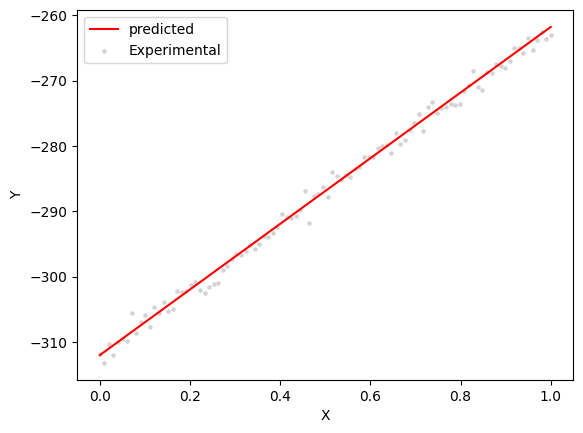

In [26]:
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X,y_pred,color="red",label="predicted")
plt.scatter(X,Y,color="lightgray",s=5,label="Experimental")
plt.legend()
plt.show()


### **Conclusion**
- **Multivariable regression** was tested on a synthetic dataset with three input variables.  
- **Single-variable regression** was visualized, showing that despite noise, the model still predicts well.